In [20]:
from nbreversible import code

In [21]:
import pandas as pd # ライブラリ pandas をインポートし、以下 pd と呼ぶことにする。

In [22]:
# https://www.kaggle.com/abcsds/pokemon から取得した Pokemon.csv を読み込む。
df = pd.read_csv("Pokemon.csv") # df とは、 pandas の DataFrame 形式のデータを入れる変数として命名

In [23]:
df.head() # 先頭５行を表示

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [24]:
df.head(50).style.bar(subset=['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])

In [25]:
df.describe() # 平均値、標準偏差、最小値、25%四分値、中央値、75%四分値、最大値をまとめて表示

#      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.000000   65.000000     3.00000  
75%     90.000000   90.000000     5.00000  
max    230.000000  180.000000     6.00000

In [26]:
# Jupyter 上で絵を表示するためのマジックコマンド
#%matplotlib inline 

import matplotlib.pyplot as plt # matplotlib.pyplot をインポートし、以下 plt と呼ぶ。

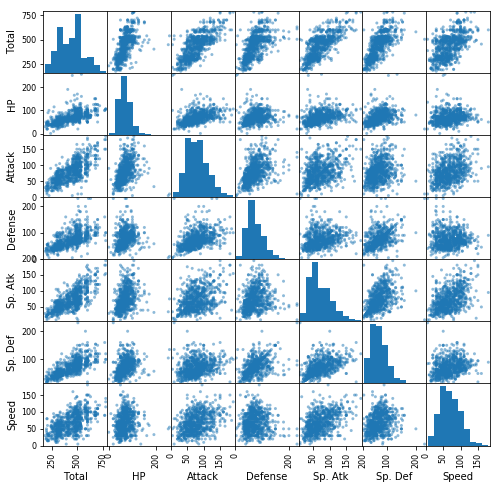

In [27]:
# 散布図行列
# from pandas.tools import plotting
from pandas import plotting # 新しいバージョンではこちらを
plotting.scatter_matrix(df.iloc[:, 4:11], figsize=(8, 8))
plt.show()

In [28]:
type1s = list(set(list(df['Type 1'])))

In [29]:
print(len(type1s), type1s)

18 ['Bug', 'Fighting', 'Ice', 'Dark', 'Dragon', 'Flying', 'Fire', 'Psychic', 'Ground', 'Fairy', 'Water', 'Electric', 'Ghost', 'Poison', 'Steel', 'Rock', 'Normal', 'Grass']


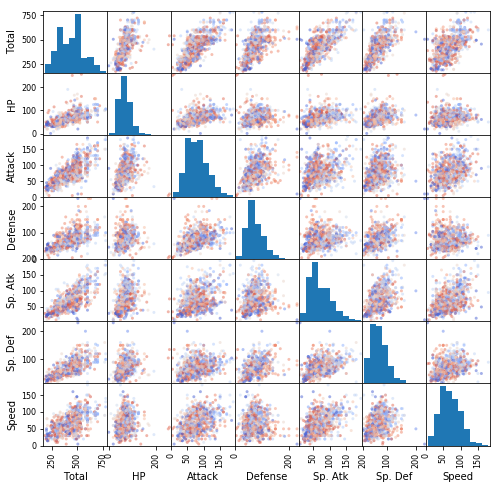

In [30]:
cmap = plt.get_cmap('coolwarm')
colors = [cmap((type1s.index(c) + 1) / (len(type1s) + 2)) for c in df['Type 1'].tolist()]
plotting.scatter_matrix(df.iloc[:, 4:11], figsize=(8, 8), color=colors, alpha=0.5)
plt.show()

In [31]:
from matplotlib.colors import LinearSegmentedColormap
dic = {'red':   ((0, 0, 0), (0.5, 1, 1), (1, 1, 1)),
       'green': ((0, 0, 0), (0.5, 1, 1), (1, 0, 0)),
       'blue':  ((0, 1, 1), (0.5, 0, 0), (1, 0, 0))}

tricolor_cmap = LinearSegmentedColormap('tricolor', dic)

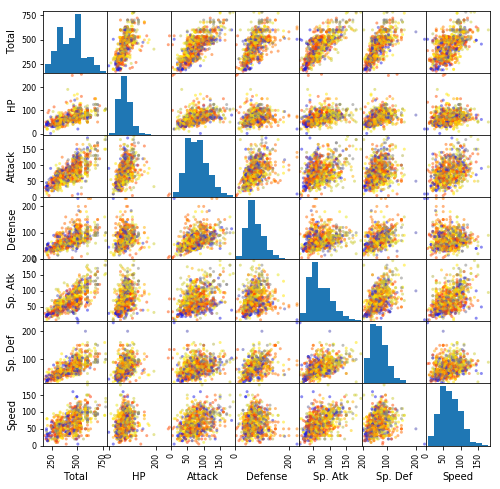

In [32]:
cmap = tricolor_cmap
colors = [cmap((type1s.index(c) + 1) / (len(type1s) + 2)) for c in df['Type 1'].tolist()]
plotting.scatter_matrix(df.iloc[:, 4:11], figsize=(8, 8), color=colors)
plt.show()

In [33]:
import numpy as np
pd.DataFrame(np.corrcoef(df.iloc[:, 4:11].T.values.tolist()),
             columns=df.iloc[:, 4:11].columns, index=df.iloc[:, 4:11].columns)

Total        HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
Total    1.000000  0.618748  0.736211  0.612787  0.747250  0.717609  0.575943
HP       0.618748  1.000000  0.422386  0.239622  0.362380  0.378718  0.175952
Attack   0.736211  0.422386  1.000000  0.438687  0.396362  0.263990  0.381240
Defense  0.612787  0.239622  0.438687  1.000000  0.223549  0.510747  0.015227
Sp. Atk  0.747250  0.362380  0.396362  0.223549  1.000000  0.506121  0.473018
Sp. Def  0.717609  0.378718  0.263990  0.510747  0.506121  1.000000  0.259133
Speed    0.575943  0.175952  0.381240  0.015227  0.473018  0.259133  1.000000

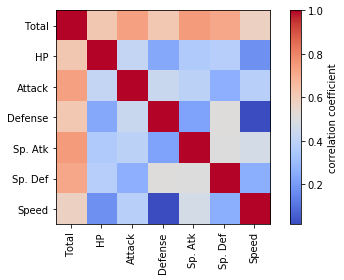

In [34]:
corrcoef = np.corrcoef(df.iloc[:, 4:11].T.values.tolist())
plt.imshow(corrcoef, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar(label='correlation coefficient')
tick_marks = np.arange(len(corrcoef))
plt.xticks(tick_marks, df.iloc[:, 4:11].columns, rotation=90)
plt.yticks(tick_marks, df.iloc[:, 4:11].columns)
plt.tight_layout()

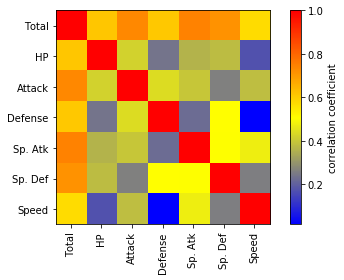

In [35]:
corrcoef = np.corrcoef(df.iloc[:, 4:11].T.values.tolist())
plt.imshow(corrcoef, interpolation='nearest', cmap=tricolor_cmap)
plt.colorbar(label='correlation coefficient')
tick_marks = np.arange(len(corrcoef))
plt.xticks(tick_marks, df.iloc[:, 4:11].columns, rotation=90)
plt.yticks(tick_marks, df.iloc[:, 4:11].columns)
plt.tight_layout()

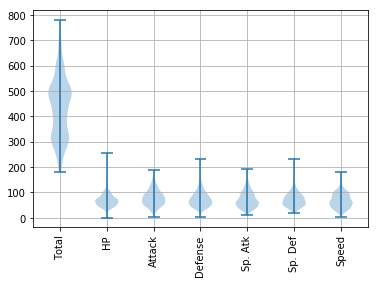

In [36]:
# バイオリンプロット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.violinplot(df.iloc[:, 4:11].values.T.tolist())
ax.set_xticks([1, 2, 3, 4, 5, 6, 7]) #データ範囲のどこに目盛りが入るかを指定する
ax.set_xticklabels(df.columns[4:11], rotation=90)
plt.grid()
plt.show()

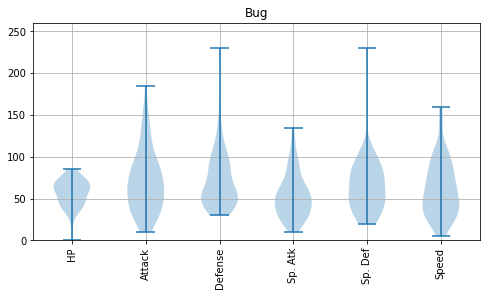

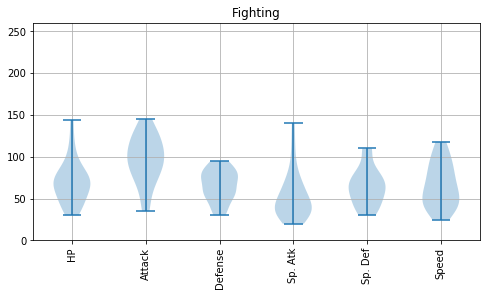

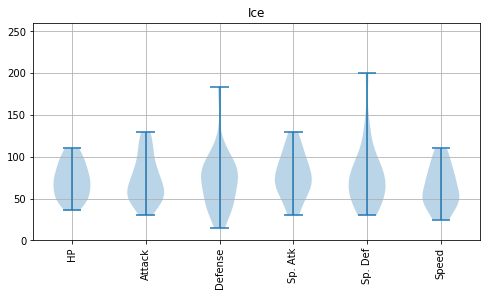

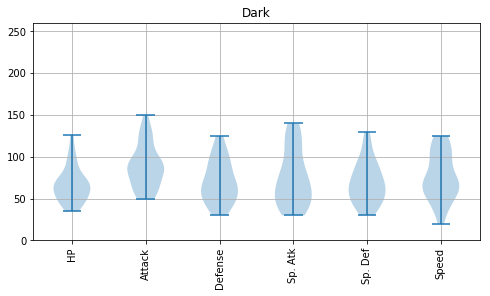

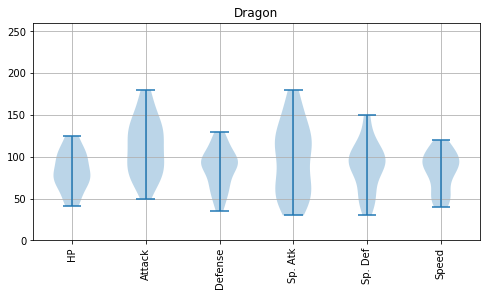

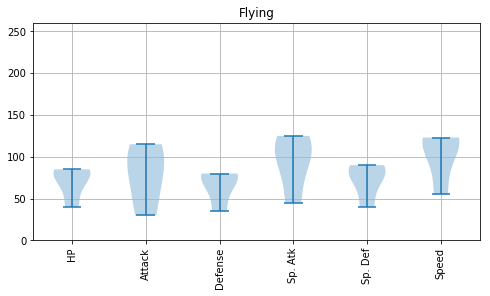

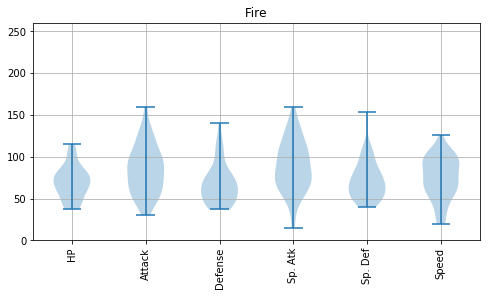

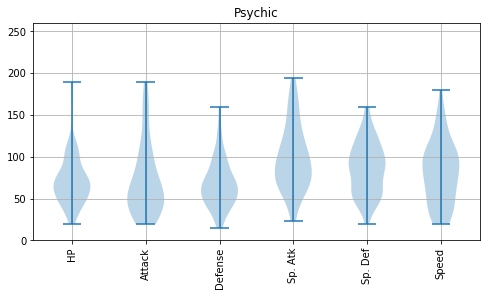

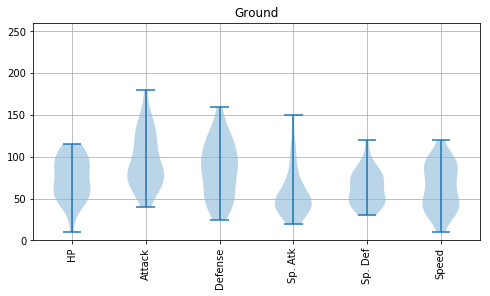

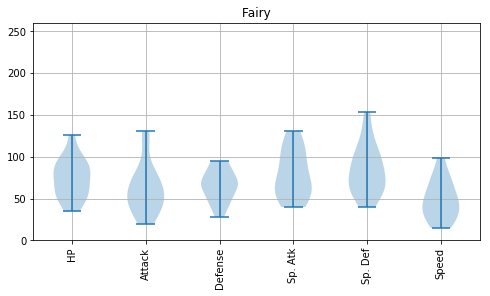

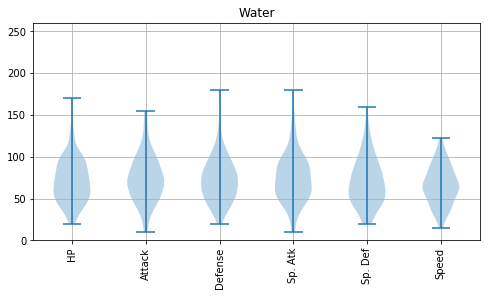

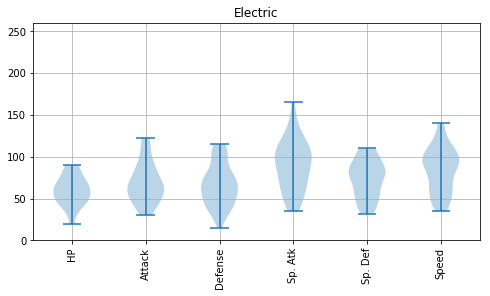

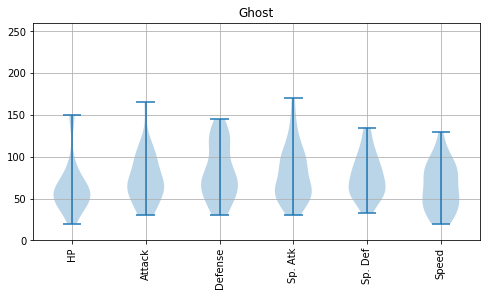

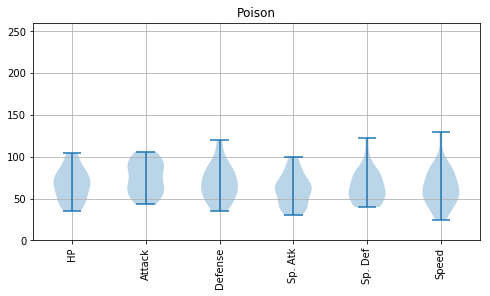

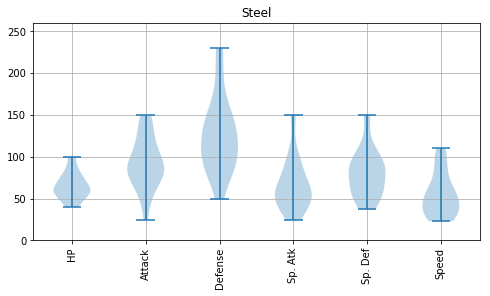

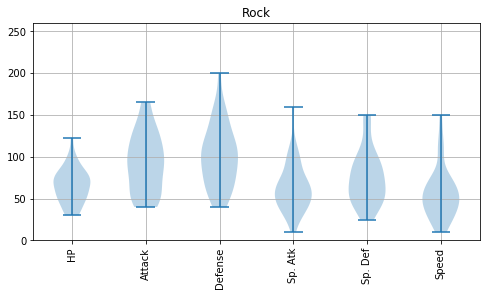

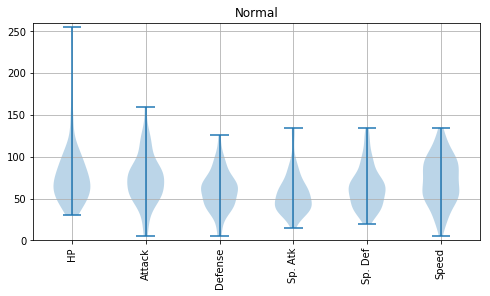

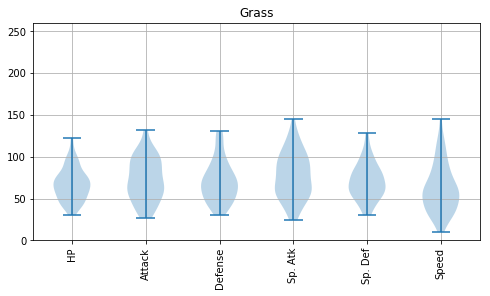

In [37]:
for index, type1 in enumerate(type1s):
    df2 = df[df['Type 1'] == type1]
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(1, 1, 1)
    plt.title(type1)
    ax.set_ylim([0, 260])
    ax.violinplot(df2.iloc[:, 5:11].values.T.tolist())
    ax.set_xticks([1, 2, 3, 4, 5, 6]) #データ範囲のどこに目盛りが入るかを指定する
    ax.set_xticklabels(df2.columns[5:11], rotation=90)
    plt.grid()
    plt.show()

In [38]:
from sklearn.decomposition import PCA #主成分分析器

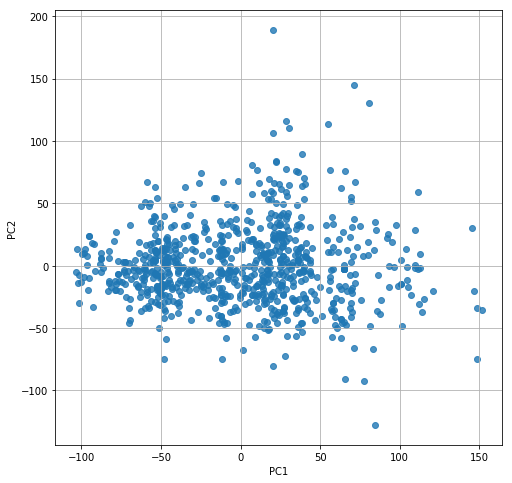

In [39]:
#主成分分析の実行
pca = PCA()
pca.fit(df.iloc[:, 5:11])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(df.iloc[:, 5:11])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

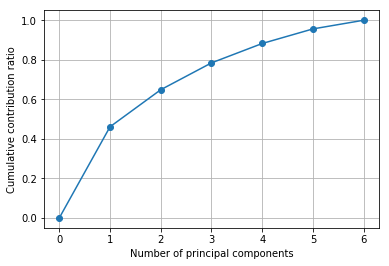

In [40]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
import numpy as np
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()

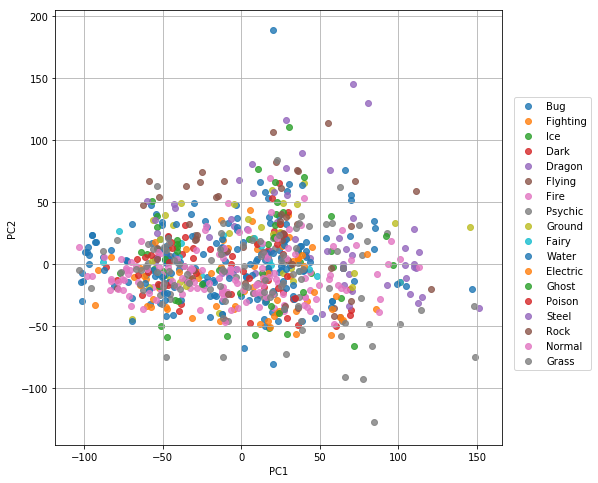

In [41]:
#主成分分析の実行
pca = PCA()
pca.fit(df.iloc[:, 5:11])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(df.iloc[:, 5:11])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for type1 in type1s:
    plt.scatter(feature[df['Type 1'] == type1, 0], feature[df['Type 1'] == type1, 1], alpha=0.8, label=type1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'upper right',
          bbox_to_anchor = (0.7, 0.7, 0.5, 0.1),
          borderaxespad = 0.0)
plt.grid()
plt.show()

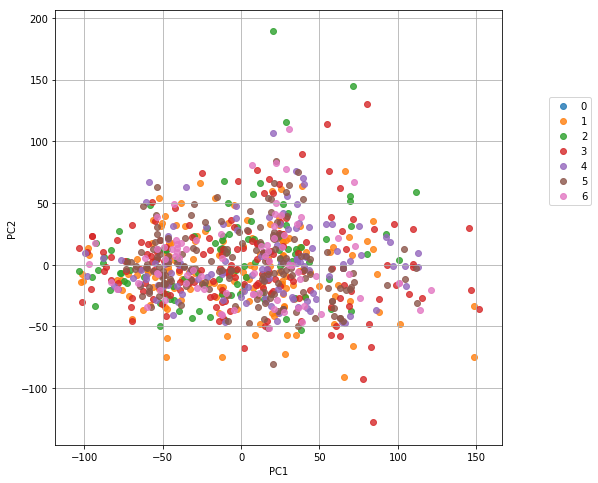

In [42]:
#主成分分析の実行
pca = PCA()
pca.fit(df.iloc[:, 5:11])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(df.iloc[:, 5:11])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for generation in range(0, 7):
    plt.scatter(feature[df['Generation'] == generation, 0], feature[df['Generation'] == generation, 1], alpha=0.8, label=generation)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'upper right',
          bbox_to_anchor = (0.7, 0.7, 0.5, 0.1),
          borderaxespad = 0.0)
plt.grid()
plt.show()

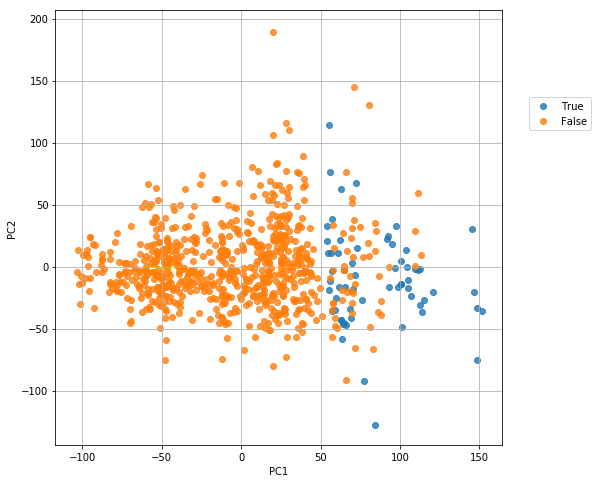

In [43]:
#主成分分析の実行
pca = PCA()
pca.fit(df.iloc[:, 5:11])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(df.iloc[:, 5:11])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for binary in [True, False]:
    plt.scatter(feature[df['Legendary'] == binary, 0], feature[df['Legendary'] == binary, 1], alpha=0.8, label=binary)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'upper right',
          bbox_to_anchor = (0.7, 0.7, 0.5, 0.1),
          borderaxespad = 0.0)
plt.grid()
plt.show()

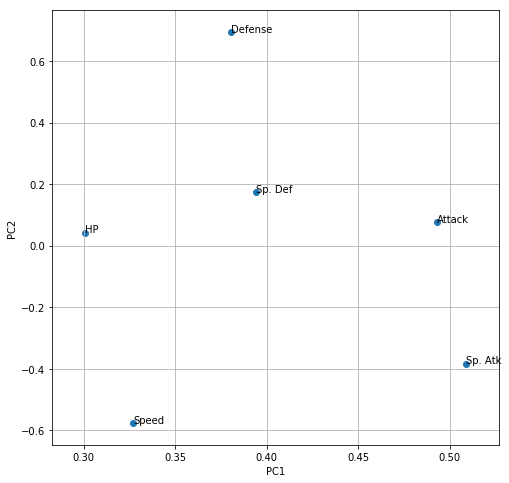

In [44]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(pca.components_[0], pca.components_[1], df.columns[5:11]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1])
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [45]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=2, max_iter=500)
factors = fa.fit_transform(df.iloc[:, 5:11])

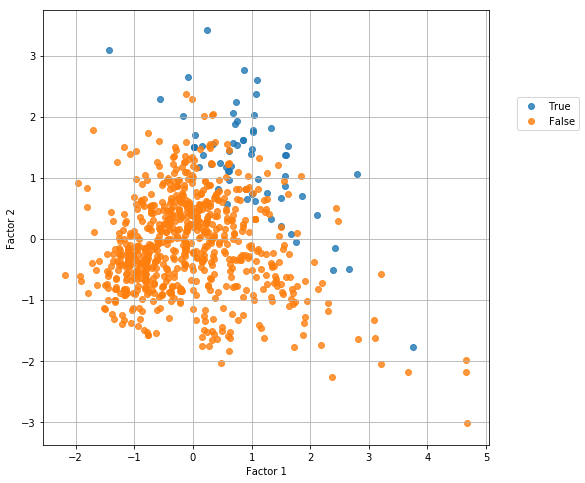

In [46]:
plt.figure(figsize=(8, 8))
for binary in [True, False]:
    plt.scatter(factors[df['Legendary'] == binary, 0], factors[df['Legendary'] == binary, 1], alpha=0.8, label=binary)
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.legend(loc = 'upper right',
          bbox_to_anchor = (0.7, 0.7, 0.5, 0.1),
          borderaxespad = 0.0)
plt.grid()
plt.show()

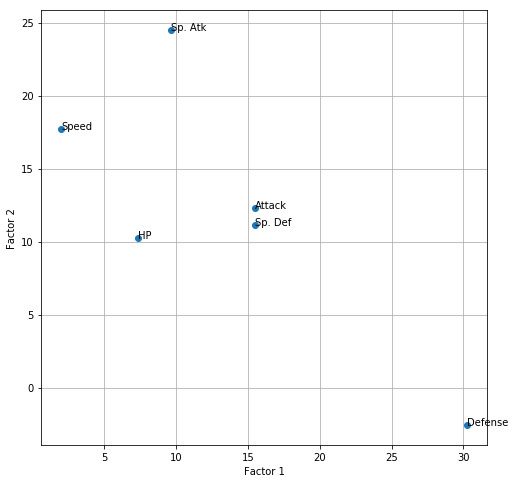

In [47]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(fa.components_[0], fa.components_[1], df.columns[5:11]):
    plt.text(x, y, name)
plt.scatter(fa.components_[0], fa.components_[1])
plt.grid()
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.show()

In [48]:
# 行列の正規化
dfs = df.iloc[:, 5:11].apply(lambda x: (x-x.mean())/x.std(), axis=0)

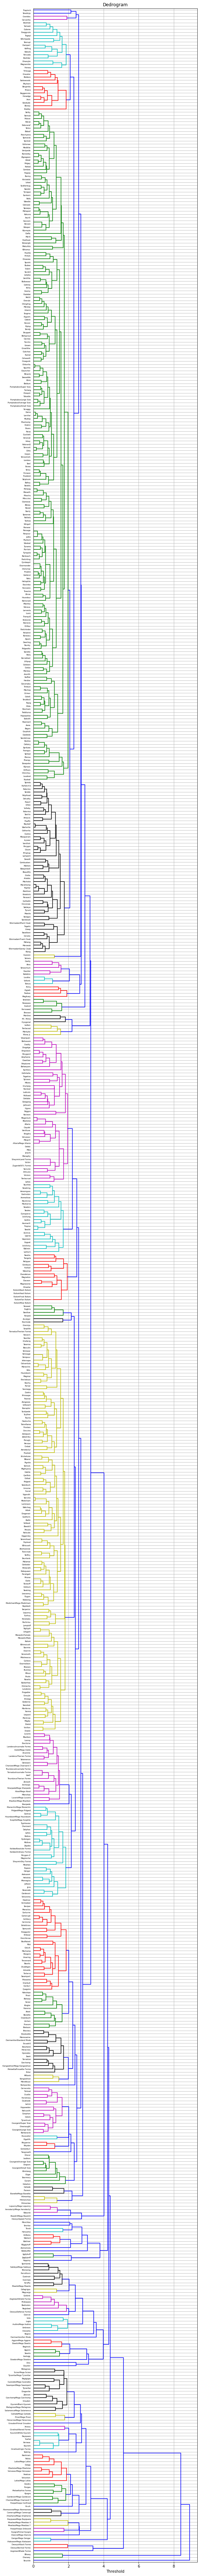

In [49]:
# metric は色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
# method も色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(dfs,
                  #metric = 'braycurtis',
                  #metric = 'canberra',
                  #metric = 'chebyshev',
                  #metric = 'cityblock',
                  #metric = 'correlation',
                  #metric = 'cosine',
                  metric = 'euclidean',
                  #metric = 'hamming',
                  #metric = 'jaccard',
                  #method= 'single')
                  method = 'average')
                  #method= 'complete')
                  #method='weighted')
plt.figure(figsize=(8, 128))
dendrogram(result1, orientation='right', labels=list(df['Name']), color_threshold=2)
plt.title("Dedrogram")
plt.xlabel("Threshold")
plt.grid()
plt.show()

In [50]:
# 指定したクラスタ数でクラスタを得る関数を作る。
def get_cluster_by_number(result, number):
    output_clusters = []
    x_result, y_result = result.shape
    n_clusters = x_result + 1
    cluster_id = x_result + 1
    father_of = {}
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in range(len(result) - 1):
        n1 = int(result[i][0])
        n2 = int(result[i][1])
        val = result[i][2]
        n_clusters -= 1
        if n_clusters >= number:
            father_of[n1] = cluster_id
            father_of[n2] = cluster_id

        cluster_id += 1

    cluster_dict = {}
    for n in range(x_result + 1):
        if n not in father_of:
            output_clusters.append([n])
            continue

        n2 = n
        m = False
        while n2 in father_of:
            m = father_of[n2]
            #print [n2, m]
            n2 = m

        if m not in cluster_dict:
            cluster_dict.update({m:[]})
        cluster_dict[m].append(n)

    output_clusters += cluster_dict.values()

    output_cluster_id = 0
    output_cluster_ids = [0] * (x_result + 1)
    for cluster in sorted(output_clusters):
        for i in cluster:
            output_cluster_ids[i] = output_cluster_id
        output_cluster_id += 1

    return output_cluster_ids

In [51]:
clusterIDs = get_cluster_by_number(result1, 50)
print(clusterIDs)

[0, 0, 1, 2, 0, 3, 4, 4, 2, 0, 0, 1, 2, 0, 0, 3, 0, 0, 3, 5, 0, 0, 3, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 1, 0, 3, 6, 7, 0, 3, 0, 0, 1, 0, 0, 0, 3, 8, 9, 0, 3, 0, 3, 0, 3, 0, 4, 0, 0, 3, 10, 10, 4, 11, 0, 0, 12, 0, 0, 12, 13, 1, 14, 14, 15, 3, 3, 0, 1, 16, 14, 17, 0, 0, 3, 0, 1, 0, 12, 14, 18, 10, 10, 4, 11, 19, 0, 1, 14, 12, 10, 9, 14, 12, 14, 0, 20, 20, 1, 14, 17, 14, 15, 21, 17, 22, 22, 14, 17, 0, 3, 10, 3, 13, 3, 4, 3, 3, 12, 23, 3, 8, 22, 24, 1, 0, 0, 1, 4, 20, 0, 14, 17, 14, 12, 3, 5, 25, 1, 4, 4, 0, 3, 24, 4, 26, 26, 1, 0, 0, 1, 0, 3, 4, 0, 0, 3, 0, 3, 0, 1, 0, 13, 0, 0, 3, 0, 1, 8, 0, 6, 14, 0, 0, 3, 0, 0, 1, 27, 1, 0, 1, 14, 1, 0, 0, 3, 0, 0, 1, 3, 0, 12, 4, 28, 3, 1, 3, 0, 29, 3, 14, 15, 1, 30, 31, 31, 0, 12, 3, 12, 24, 32, 22, 23, 9, 0, 12, 0, 33, 0, 12, 0, 0, 12, 0, 13, 30, 0, 3, 4, 1, 0, 15, 1, 3, 0, 0, 20, 10, 3, 3, 22, 21, 4, 22, 1, 0, 0, 24, 24, 28, 2, 1, 0, 3, 3, 4, 0, 0, 4, 4, 0, 0, 12, 24, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 9, 0, 17, 0,

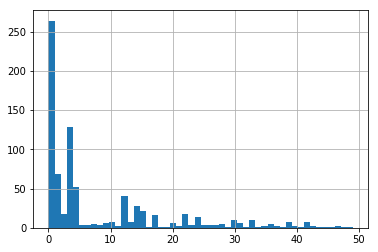

In [52]:
plt.hist(clusterIDs, bins=50)
plt.grid()
plt.show()

Cluster 1: 264 samples


/home/nao/venvs/viz/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


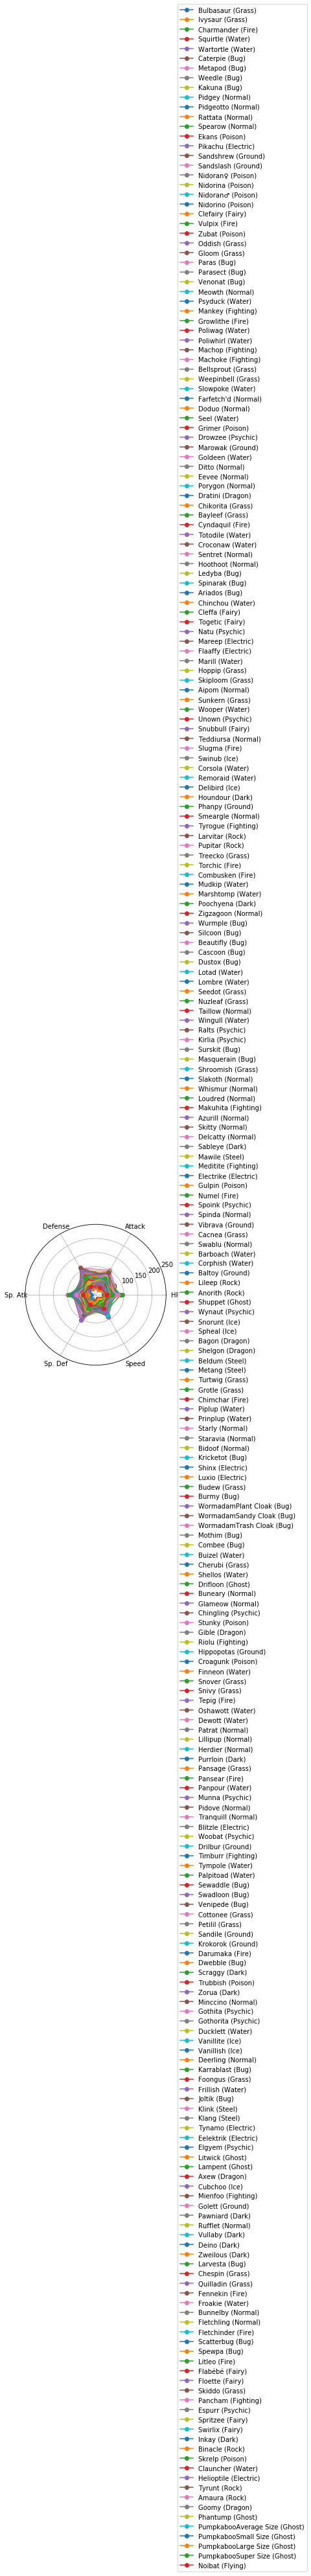

Cluster 2: 68 samples


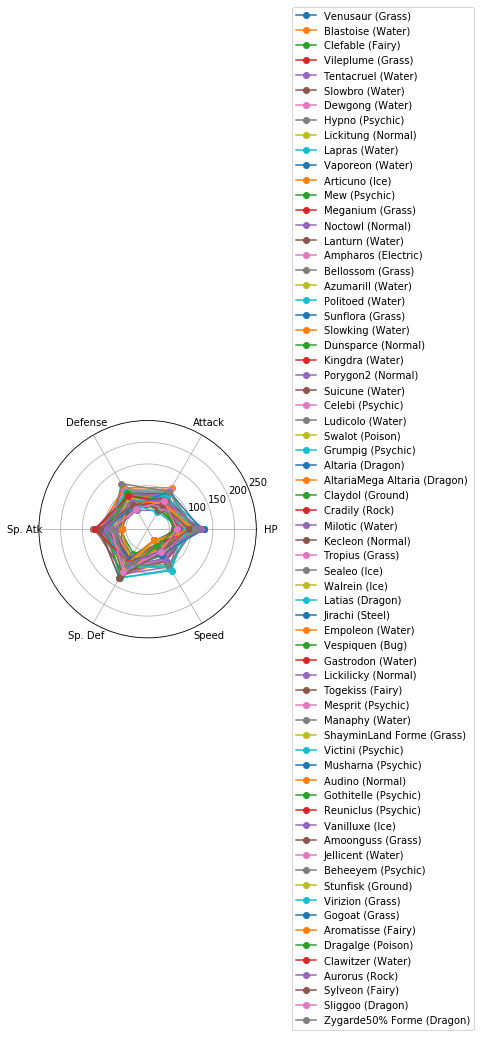

Cluster 3: 17 samples


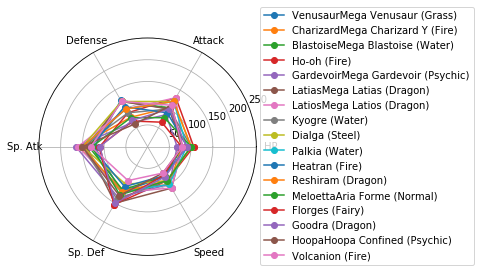

Cluster 4: 128 samples


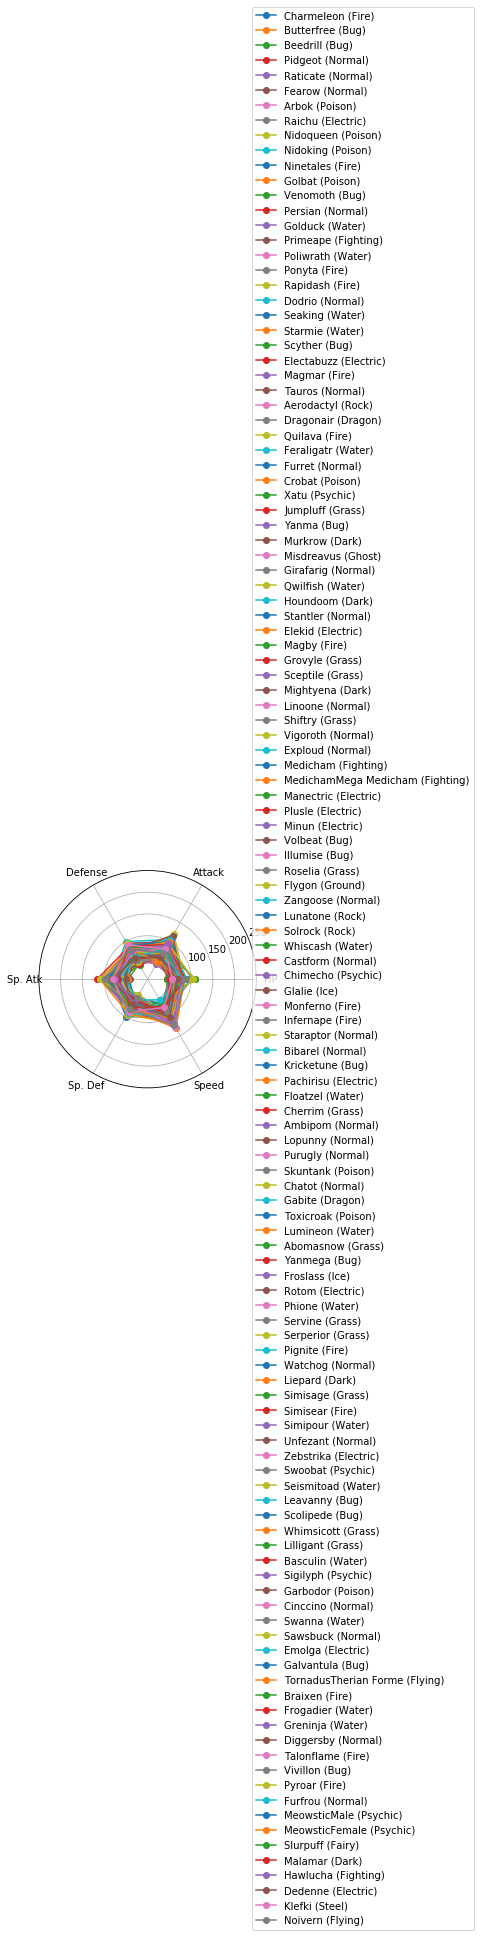

Cluster 5: 52 samples


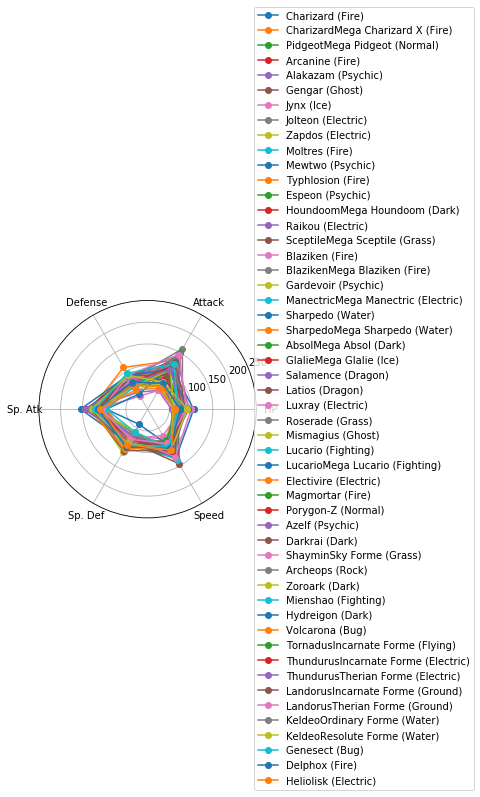

Cluster 6: 4 samples


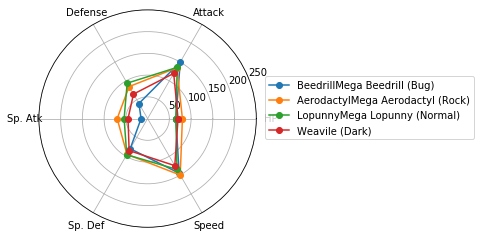

Cluster 7: 3 samples


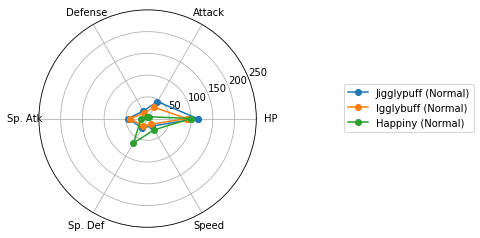

Cluster 8: 5 samples


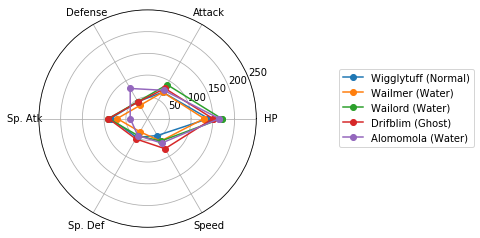

Cluster 9: 4 samples


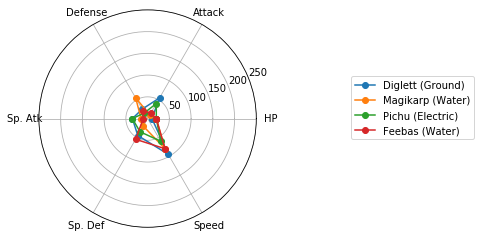

Cluster 10: 6 samples


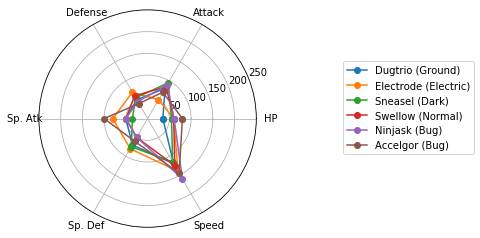

Cluster 11: 8 samples


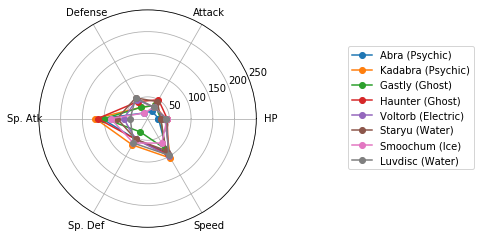

Cluster 12: 2 samples


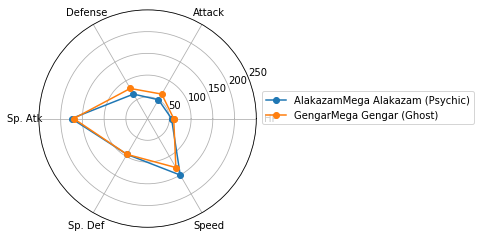

Cluster 13: 41 samples


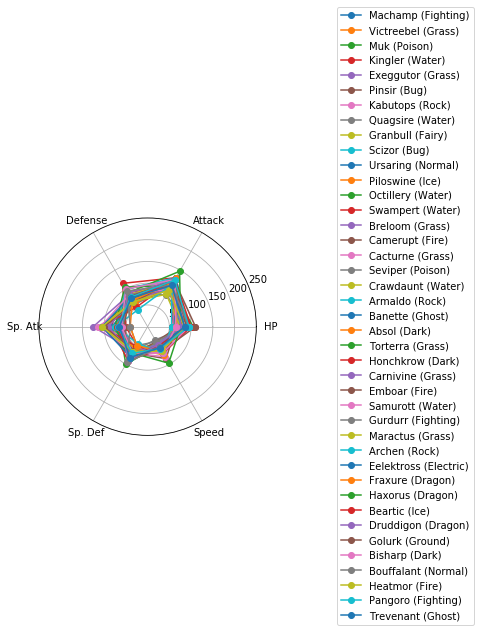

Cluster 14: 7 samples


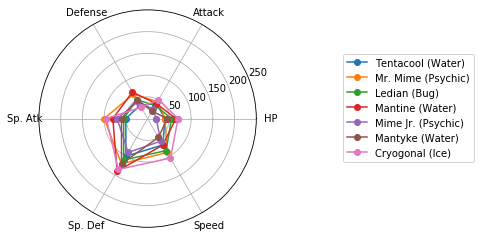

Cluster 15: 28 samples


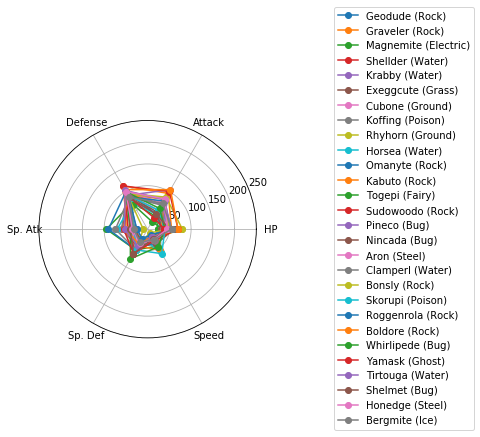

Cluster 16: 21 samples


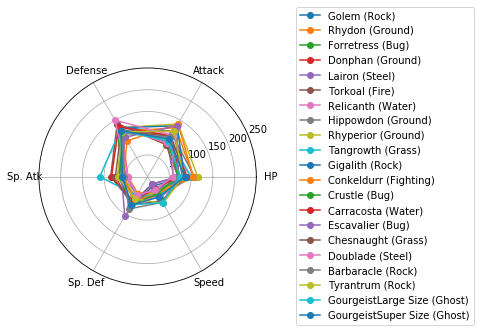

Cluster 17: 1 samples


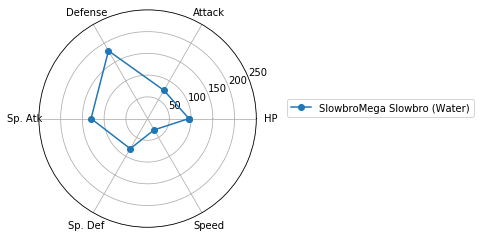

Cluster 18: 16 samples


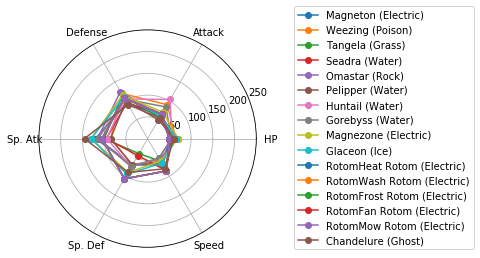

Cluster 19: 1 samples


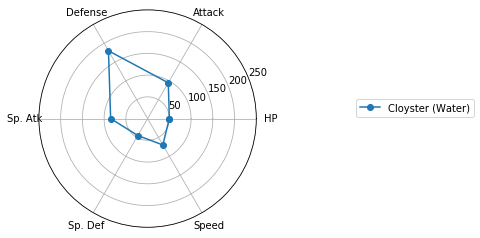

Cluster 20: 1 samples


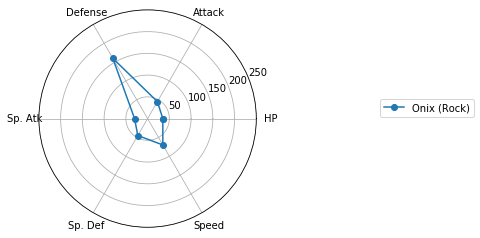

Cluster 21: 6 samples


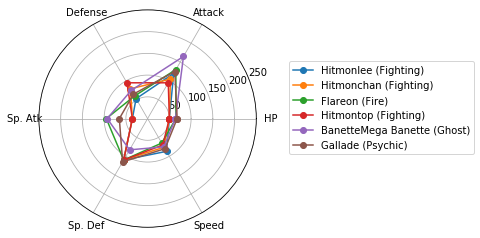

Cluster 22: 2 samples


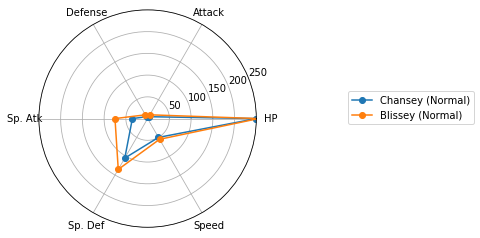

Cluster 23: 17 samples


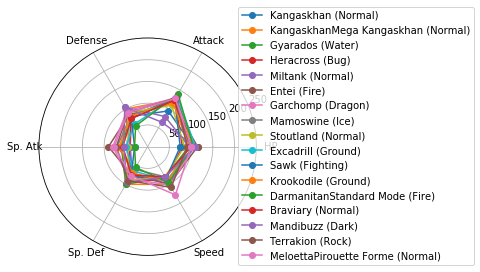

Cluster 24: 3 samples


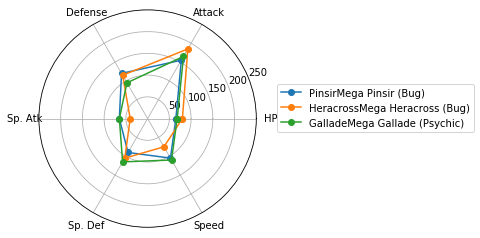

Cluster 25: 14 samples


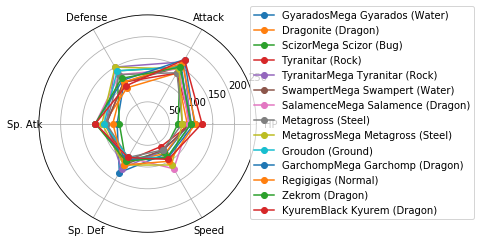

Cluster 26: 4 samples


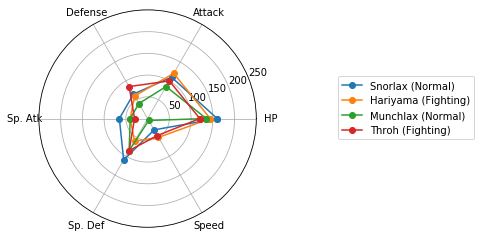

Cluster 27: 3 samples


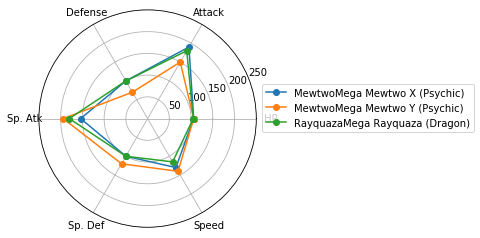

Cluster 28: 3 samples


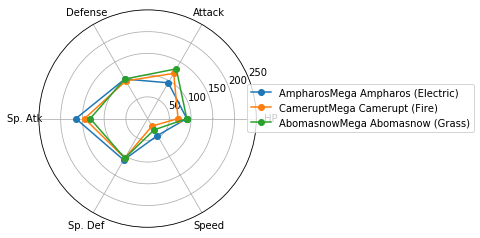

Cluster 29: 5 samples


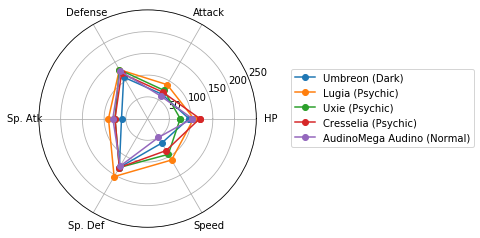

Cluster 30: 1 samples


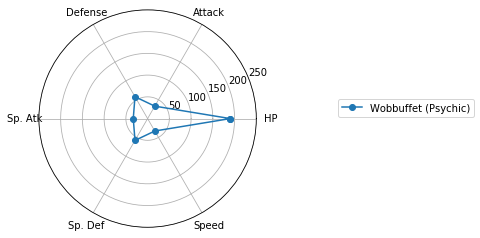

Cluster 31: 10 samples


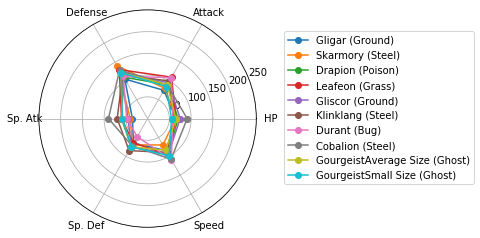

Cluster 32: 6 samples


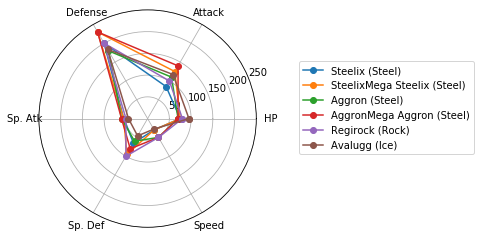

Cluster 33: 1 samples


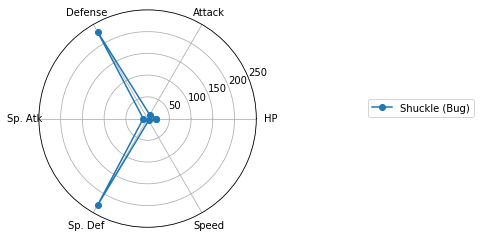

Cluster 34: 10 samples


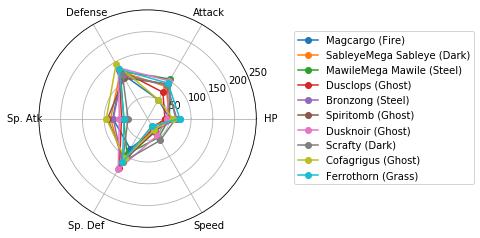

Cluster 35: 1 samples


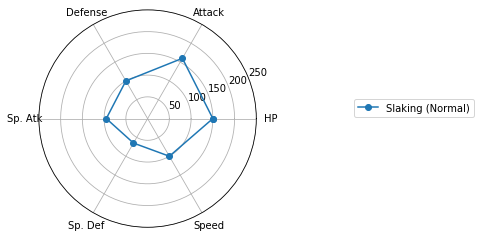

Cluster 36: 2 samples


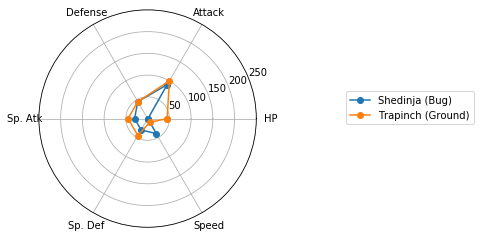

Cluster 37: 5 samples


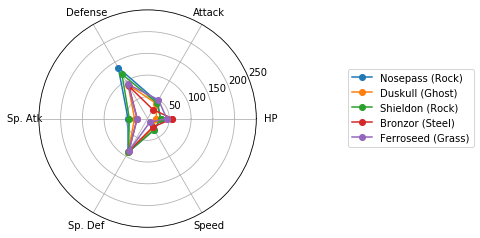

Cluster 38: 2 samples


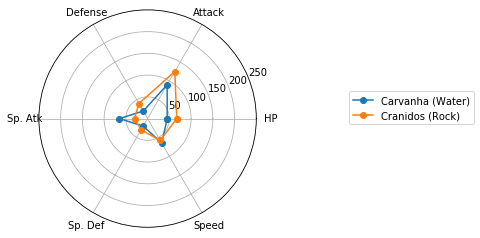

Cluster 39: 1 samples


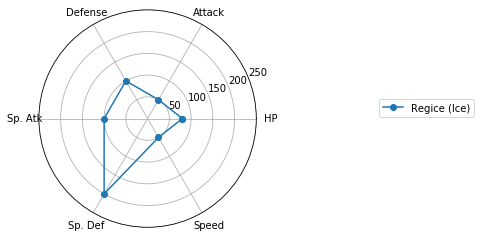

Cluster 40: 7 samples


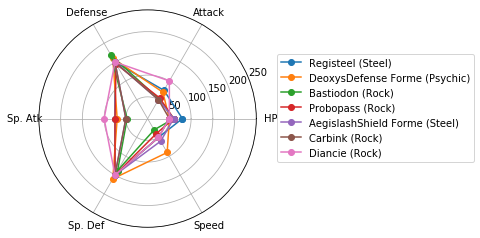

Cluster 41: 2 samples


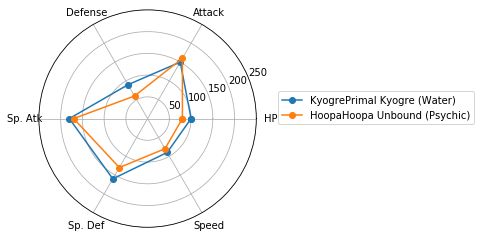

Cluster 42: 1 samples


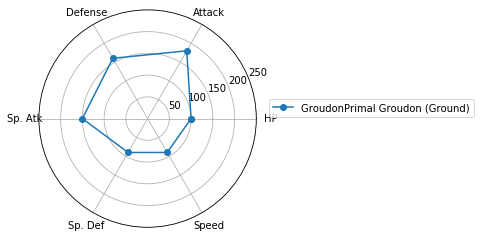

Cluster 43: 8 samples


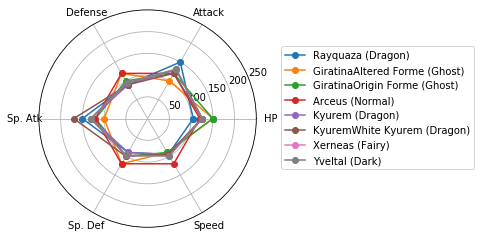

Cluster 44: 2 samples


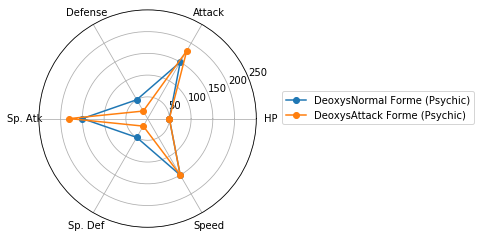

Cluster 45: 1 samples


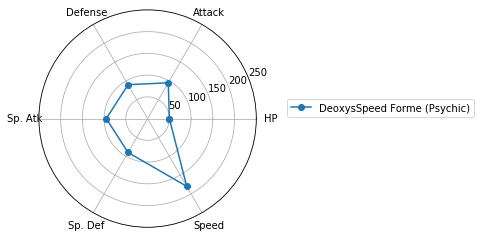

Cluster 46: 1 samples


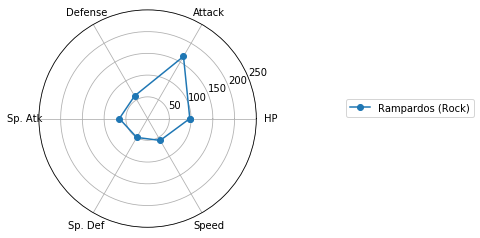

Cluster 47: 1 samples


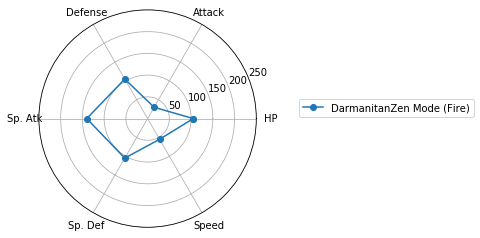

Cluster 48: 2 samples


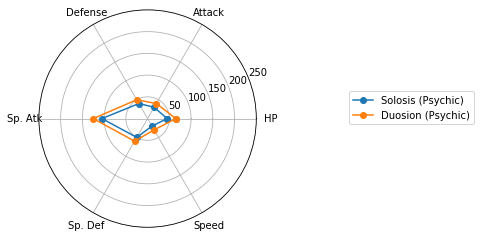

Cluster 49: 1 samples


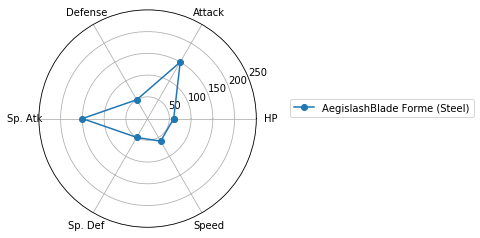

Cluster 50: 1 samples


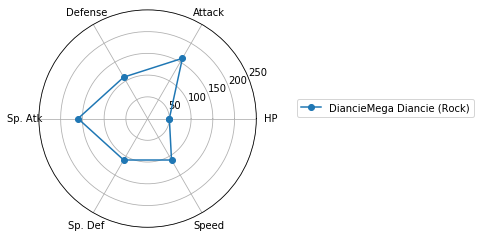

In [53]:
for i in range(max(clusterIDs) + 1):
    cluster = []
    for j, k in enumerate(clusterIDs):
        if i == k:
            cluster.append(j)
    fig = plt.figure()
    print("Cluster {}: {} samples".format(i + 1, len(cluster)))
    for j in cluster:
        labels = list(df.columns[5:11])
        values = list(df.iloc[j, 5:11])
        angles = np.linspace(0, 2 * np.pi, len(labels) + 1, endpoint=True)
        values = np.concatenate((values, [values[0]]))  # 閉じた多角形にする
        ax = fig.add_subplot(111, polar=True)
        ax.plot(angles, values, 'o-', label=df.iloc[j, :]['Name'] + " (" + df.iloc[j, :]['Type 1'] + ")")  # 外枠
        #ax.fill(angles, values, alpha=0.25)  # 塗りつぶし
        ax.set_thetagrids(angles[:-1] * 180 / np.pi, labels)  # 軸ラベル
        ax.set_rlim(0 ,250)
    plt.legend( loc = 'center right',
          bbox_to_anchor = (1.5, 0.5, 0.5, 0.1),
          borderaxespad = 0.0)
    plt.show()

In [54]:
X = df.iloc[:, 5:11]
y = df['Total']

In [55]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y) # 予測モデルを作成

print("回帰係数= ", regr.coef_)
print("切片= ", regr.intercept_)
print("決定係数= ", regr.score(X, y))

回帰係数=  [1. 1. 1. 1. 1. 1.]
切片=  5.684341886080802e-14
決定係数=  1.0


In [56]:
df.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [57]:
df.columns[[5, 6, 7, 10]]

Index(['HP', 'Attack', 'Defense', 'Speed'], dtype='object')

In [58]:
X = df.iloc[:, [5, 6, 7, 10]]
y = df['Sp. Atk']

In [59]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y) # 予測モデルを作成

print("回帰係数= ", regr.coef_)
print("切片= ", regr.intercept_)
print("決定係数= ", regr.score(X, y))

回帰係数=  [0.28468407 0.10004721 0.12673883 0.4439368 ]
切片=  5.529675896993467
決定係数=  0.3333279772212076


In [60]:
#from sklearn.cross_validation import train_test_split # 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) # 訓練データ・テストデータへのランダムな分割

In [61]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train) # 予測モデルを作成

print("回帰係数= ", regr.coef_)
print("切片= ", regr.intercept_)
print("決定係数(train)= ", regr.score(X_train, y_train))
print("決定係数(test)= ", regr.score(X_test, y_test))

回帰係数=  [0.26406303 0.15259461 0.08417383 0.4408106 ]
切片=  6.494391942311225
決定係数(train)=  0.33985022502880424
決定係数(test)=  0.31505820758498126


In [62]:
Xs = X.apply(lambda x: (x-x.mean())/x.std(), axis=0)
ys = list(pd.DataFrame(y).apply(lambda x: (x-x.mean())/x.std()).values.reshape(len(y),))

In [63]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(Xs, ys) # 予測モデルを作成

print("標準回帰係数= ", regr.coef_)
print("切片= ", regr.intercept_)
print("決定係数= ", regr.score(Xs, ys))

標準回帰係数=  [0.22215171 0.0992372  0.12077883 0.39425762]
切片=  3.2105349393792207e-16
決定係数=  0.33332797722120766


In [64]:
pd.DataFrame(regr.coef_, index=list(df.columns[[5, 6, 7, 10]])).sort_values(0, ascending=False).style.bar(subset=[0])

In [65]:
df2 = pd.get_dummies(df.iloc[:, 2:], dummy_na=True)
df2.head()

Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  \
0    318  45      49       49       65       65     45           1      False   
1    405  60      62       63       80       80     60           1      False   
2    525  80      82       83      100      100     80           1      False   
3    625  80     100      123      122      120     80           1      False   
4    309  39      52       43       60       50     65           1      False   

   Type 1_Bug  ...  Type 2_Grass  Type 2_Ground  Type 2_Ice  Type 2_Normal  \
0           0  ...             0              0           0              0   
1           0  ...             0              0           0              0   
2           0  ...             0              0           0              0   
3           0  ...             0              0           0              0   
4           0  ...             0              0           0              0   

   Type 2_Poison  Type 2_Psychic  Type 2_Rock  Type 2_Steel  Type 2_Water  \
0              1               0            0             0             0   
1              1               0            0             0             0   
2              1               0            0             0             0   
3              1               0            0             0             0   
4              0               0            0             0             0   

   Type 2_nan  
0           0  
1           0  
2           0  
3           0  
4           1  

[5 rows x 47 columns]

In [66]:
X = df2
del X['Total']
del X['Sp. Atk']
del X['Sp. Def']
del X['Legendary']
X.head()

HP  Attack  Defense  Speed  Generation  Type 1_Bug  Type 1_Dark  \
0  45      49       49     45           1           0            0   
1  60      62       63     60           1           0            0   
2  80      82       83     80           1           0            0   
3  80     100      123     80           1           0            0   
4  39      52       43     65           1           0            0   

   Type 1_Dragon  Type 1_Electric  Type 1_Fairy  ...  Type 2_Grass  \
0              0                0             0  ...             0   
1              0                0             0  ...             0   
2              0                0             0  ...             0   
3              0                0             0  ...             0   
4              0                0             0  ...             0   

   Type 2_Ground  Type 2_Ice  Type 2_Normal  Type 2_Poison  Type 2_Psychic  \
0              0           0              0              1               0   
1              0           0              0              1               0   
2              0           0              0              1               0   
3              0           0              0              1               0   
4              0           0              0              0               0   

   Type 2_Rock  Type 2_Steel  Type 2_Water  Type 2_nan  
0            0             0             0           0  
1            0             0             0           0  
2            0             0             0           0  
3            0             0             0           0  
4            0             0             0           1  

[5 rows x 43 columns]

In [67]:
#from sklearn.cross_validation import train_test_split # 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) # 訓練データ・テストデータへのランダムな分割

In [68]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train) # 予測モデルを作成

print("回帰係数= ", regr.coef_)
print("切片= ", regr.intercept_)
print("決定係数(train)= ", regr.score(X_train, y_train))
print("決定係数(test)= ", regr.score(X_test, y_test))

回帰係数=  [ 2.24844758e-01  2.86911455e-01  1.62148996e-01  2.51241238e-01
  1.36265416e-01 -1.36489439e+01 -1.85652314e+00  1.19150699e+00
  2.02172117e+01  1.53294426e+01 -2.87071280e+01  2.26727604e+01
  9.96807768e+00  2.55536153e+00  1.03085798e+01 -2.24674903e+01
  1.11090055e+01 -1.72691439e+01 -6.92093940e+00  2.05741974e+01
 -8.74542457e+00 -1.89199986e+01  4.60944822e+00 -1.42108547e-14
 -2.42534666e+01  4.67902741e-01  1.60074886e+01  1.26205600e+01
  9.40043388e+00 -1.61979017e+01  2.92032325e+01 -2.05280772e+00
 -2.84287774e+00 -6.58191101e+00 -1.57828759e+01 -2.48408504e+00
  7.12723412e+00 -6.14975582e-01  1.82955632e+01 -1.82232752e+01
 -4.61002831e+00  5.42338268e+00 -4.90159311e+00]
切片=  8.26494981767462
決定係数(train)=  0.5767543657786456
決定係数(test)=  0.4366623494342496


In [69]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
print("決定係数(train)= ", regr.score(X_train, y_train))
print("決定係数(test)= ", regr.score(X_test, y_test))

決定係数(train)=  0.38615594794488917
決定係数(test)=  0.3111175758208963


In [70]:
regr.feature_importances_

array([0.41995114, 0.04905708, 0.11609874, 0.39572364, 0.00159268,
       0.00161007, 0.00091221, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01278944, 0.        , 0.002265  ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [71]:
pd.DataFrame(regr.feature_importances_, index=list(X.columns)).sort_values(0, ascending=False).head(10).style.bar(subset=[0])

In [72]:
df2 = pd.get_dummies(df.iloc[:, 2:], dummy_na=True)
X = df2
del X['Total']
del X['Sp. Atk']
del X['Sp. Def']
del X['Legendary']
X.head()
y = df['Legendary']

In [73]:
#from sklearn.cross_validation import train_test_split # 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) # 訓練データ・テストデータへのランダムな分割

In [74]:
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
clf = LogisticRegression(solver='lbfgs', max_iter=10000) #モデルの生成
clf.fit(X_train, y_train) #学習
print("正解率(train): ", clf.score(X_train,y_train))
print("正解率(test): ", clf.score(X_test,y_test))

正解率(train):  0.9541666666666667
正解率(test):  0.915625


In [75]:
from sklearn.metrics import confusion_matrix # 混合行列
# 予測結果と、正解（本当の答え）がどのくらい合っていたかを表す混合行列
pd.DataFrame(confusion_matrix(clf.predict(X_test), y_test), index=['predicted 0', 'predicted 1'], columns=['real 0', 'real 1'])

real 0  real 1
predicted 0     283      22
predicted 1       5      10

In [76]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=10000)
clf.fit(X_train, y_train) #学習
print("正解率(train): ", clf.score(X_train,y_train))
print("正解率(test): ", clf.score(X_test,y_test))

正解率(train):  0.9604166666666667
正解率(test):  0.909375


In [77]:
from sklearn.metrics import confusion_matrix # 混合行列
# 予測結果と、正解（本当の答え）がどのくらい合っていたかを表す混合行列
pd.DataFrame(confusion_matrix(clf.predict(X_test), y_test), index=['predicted 0', 'predicted 1'], columns=['real 0', 'real 1'])

real 0  real 1
predicted 0     285      26
predicted 1       3       6

In [78]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train) #学習
print("正解率(train): ", clf.score(X_train,y_train))
print("正解率(test): ", clf.score(X_test,y_test))

正解率(train):  1.0
正解率(test):  0.934375


In [79]:
from sklearn.metrics import confusion_matrix # 混合行列
# 予測結果と、正解（本当の答え）がどのくらい合っていたかを表す混合行列
pd.DataFrame(confusion_matrix(clf.predict(X_test), y_test), index=['predicted 0', 'predicted 1'], columns=['real 0', 'real 1'])

real 0  real 1
predicted 0     286      19
predicted 1       2      13

In [80]:
pd.DataFrame(clf.feature_importances_, index=list(X.columns)).sort_values(0, ascending=False).style.bar(subset=[0])

In [81]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, classification_report, confusion_matrix
# AUCスコアを出す。
probas = clf.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)
print ("ROC score : ",  roc_auc)

ROC score :  0.9606662326388891


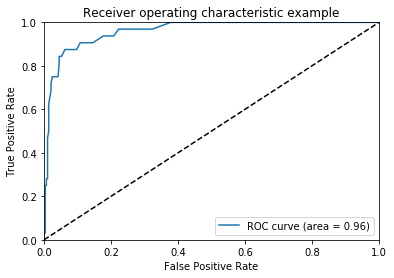

In [82]:
# ROC curve を描く
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [83]:
# AUPRスコアを出す
precision, recall, thresholds = precision_recall_curve(y_test, probas[:, 1])
area = auc(recall, precision)
print ("AUPR score: " , area)

AUPR score:  0.7313477503260121


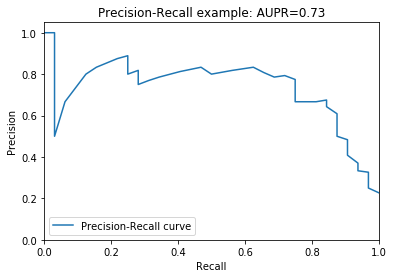

In [84]:
# PR curve を描く
plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUPR=%0.2f' % area)
plt.legend(loc="lower left")
plt.show()